In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import backend

In [124]:

def _x(t,data):
    return 0 if t < 0 else data[t]

def x(t,data):
    beta = 0.2
    gamma = 0.1
    tau = 25
    n = 10
    return _x(t-1,data) + (beta*_x(t-tau-1,data))/(1+_x(t-tau-1,data)**n) - gamma*_x(t-1,data)

def mackey_glass_generator():


    N = 2000

    data = np.zeros(N)
    data[0] = 1.5

    for t in range(1,N):
        data[t] = x(t,data)

    return data
def get_train_test_data(x):
    train_set = np.zeros([1000,5])
    train_labels = np.zeros([1000])
    
    for t in range(300,1300):
        train_set[t-300,:] = [x[t-20], x[t-15], x[t-10], x[t-5], x[t]]
        train_labels[t-300] = x[t+5] 

    test_set = np.zeros([200,5])
    test_labels = np.zeros([200])
    
    for t in range(1300,1500):
        test_set[t-1300,:] = [x[t-20], x[t-15], x[t-10], x[t-5], x[t]]
        test_labels[t-1300] = x[t+5] 
        
    return train_set, train_labels, test_set, test_labels

def init_network(num_nodes, lambd):
    if len(num_nodes) < 1:
        return None

    model = Sequential()

    num_layers = len(num_nodes)
    model.add(Dense(num_nodes[0], input_dim=5, kernel_initializer='normal', activation='relu',use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    for i in range(1, num_layers):
        model.add(Dense(num_nodes[i], kernel_initializer='normal', activation='relu', use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    model.add(Dense(1, kernel_initializer='normal', activation='relu', use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    #not sparse data so we use L2 reg
    model.summary()
    sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='mse',metrics=['MSE'])
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, min_delta=0.001, patience=100)
    return model, es

2000


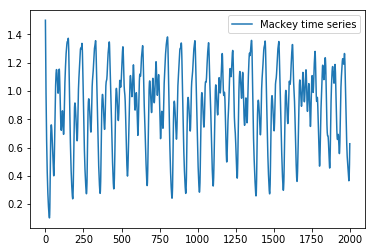

In [126]:
x = mackey_glass_generator()
print(len(x))
t = np.arange(len(x))
plt_A, = plt.plot(t,x, label='Mackey time series')
plt.legend(handles=[plt_A])
plt.show()

Nodes first layer:  1 , Nodes second layer 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 1)                 6         
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 2         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934374675154686
MSE val: 0.9078386873006821


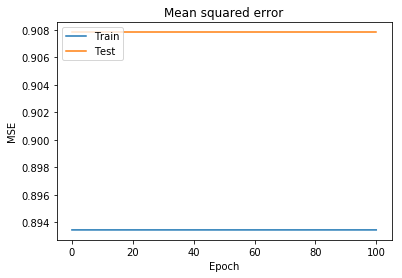

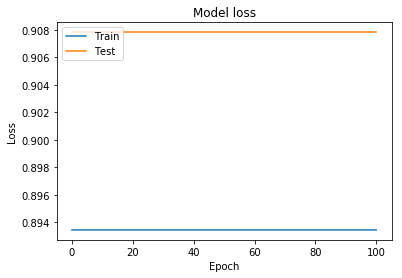

Nodes first layer:  10 , Nodes second layer 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Epoch 00337: early stopping
MSE training: 0.0013760860892944038
MSE val: 0.0012770499743055552


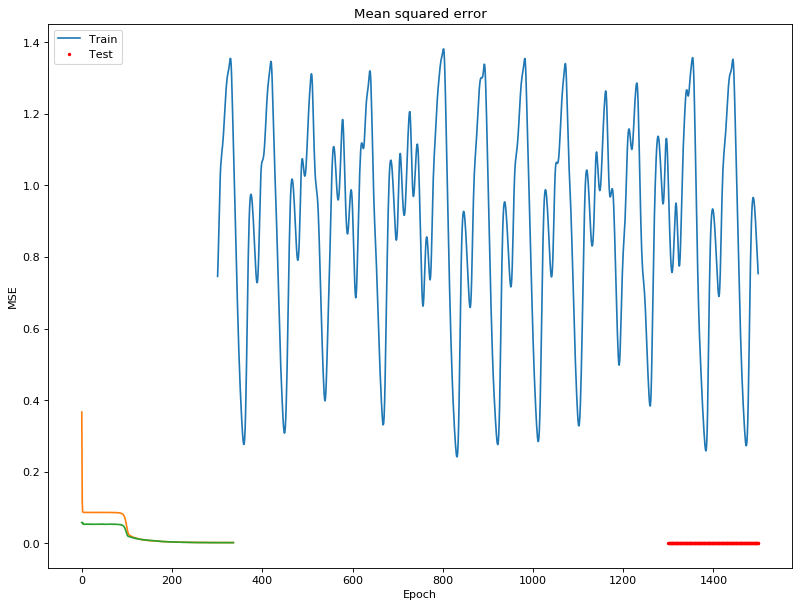

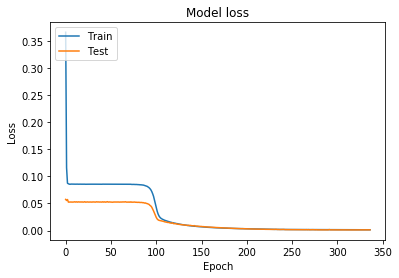

Nodes first layer:  50 , Nodes second layer 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934374861419201
MSE val: 0.9078386873006821


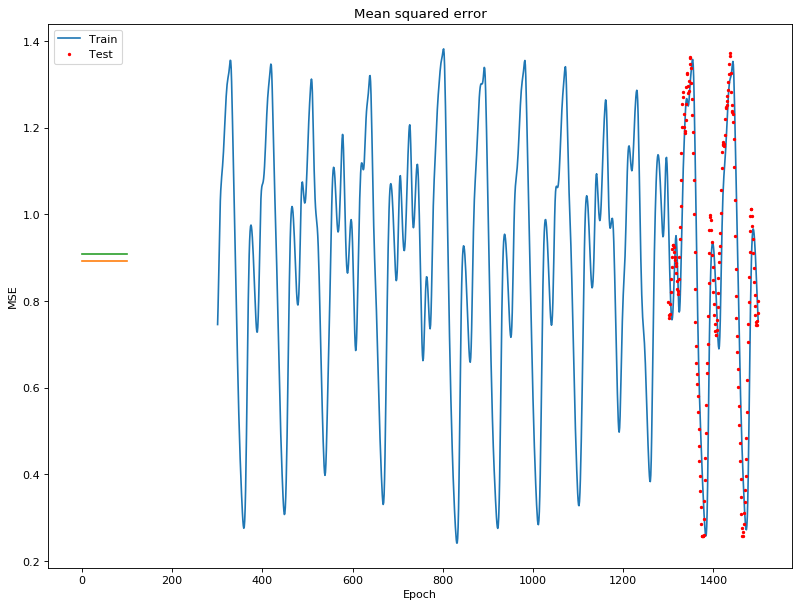

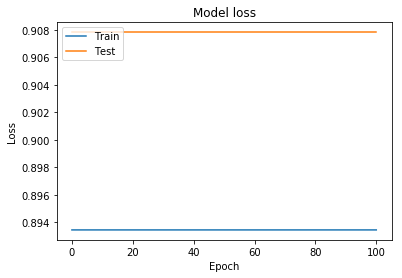

Nodes first layer:  100 , Nodes second layer 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934375084936619
MSE val: 0.9078386873006821


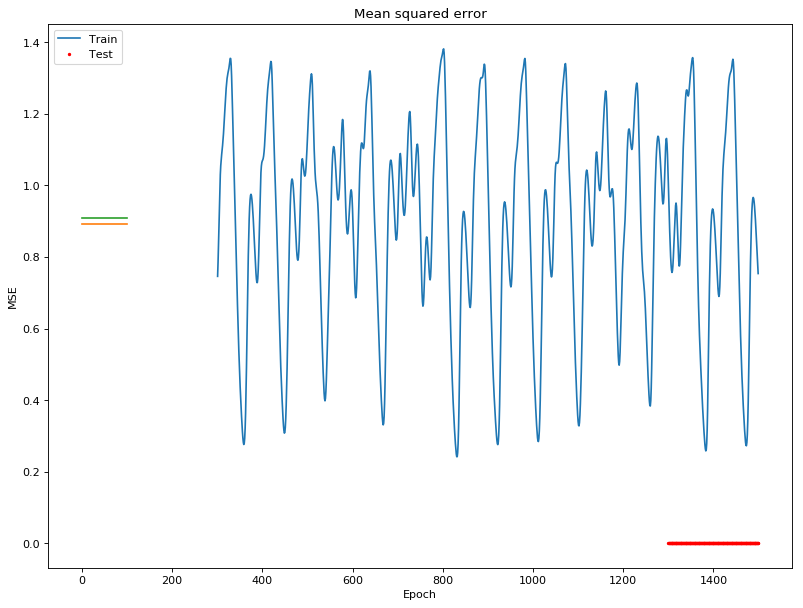

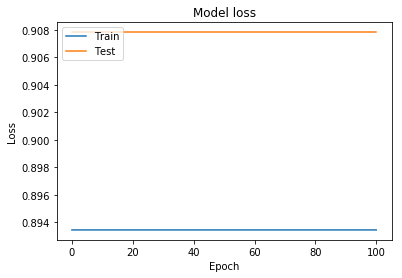

Nodes first layer:  1 , Nodes second layer 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934374675154686
MSE val: 0.9078386873006821


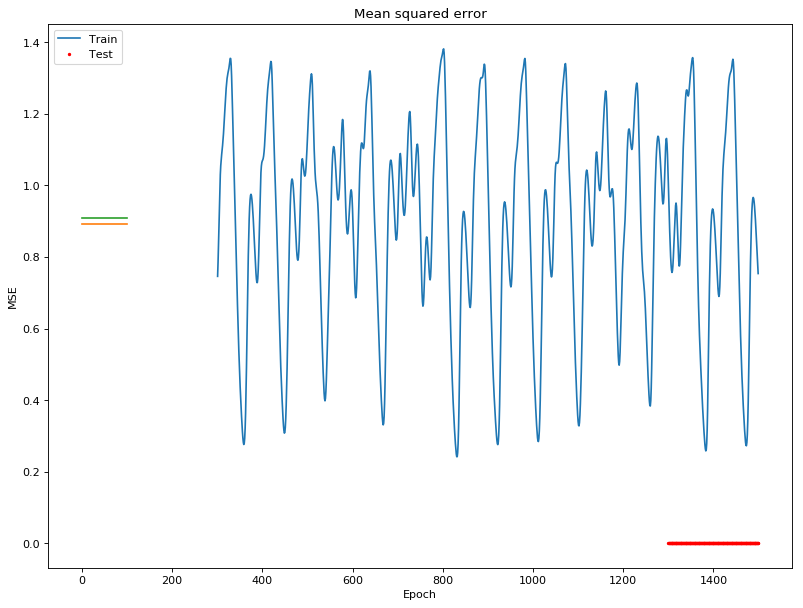

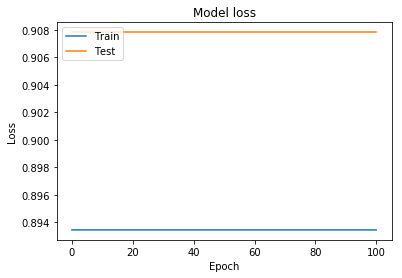

Nodes first layer:  10 , Nodes second layer 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 00337: early stopping
MSE training: 0.0013421716575976461
MSE val: 0.0011204355541849509


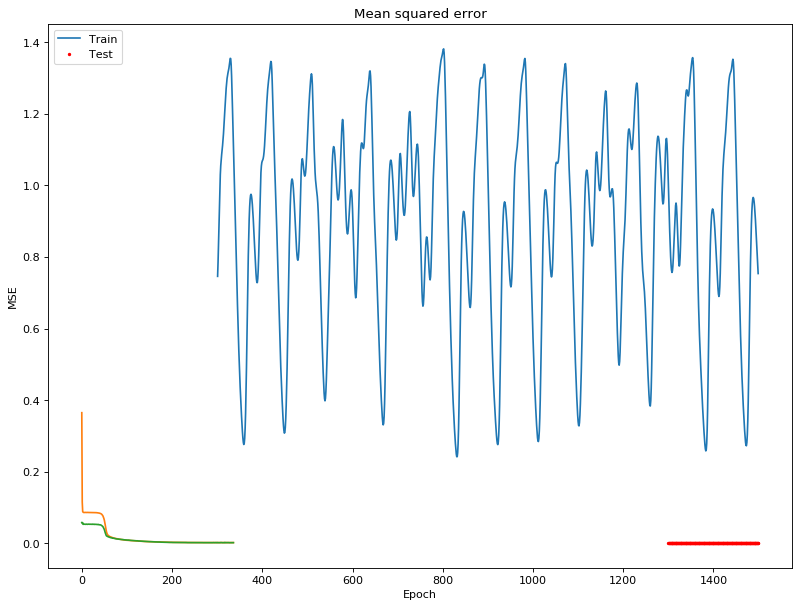

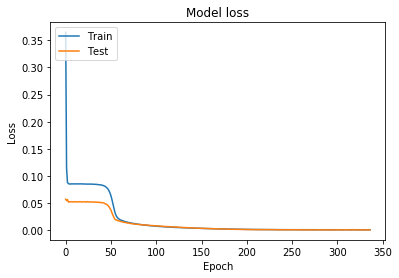

Nodes first layer:  50 , Nodes second layer 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 821
Trainable params: 821
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934374786913395
MSE val: 0.9078386873006821


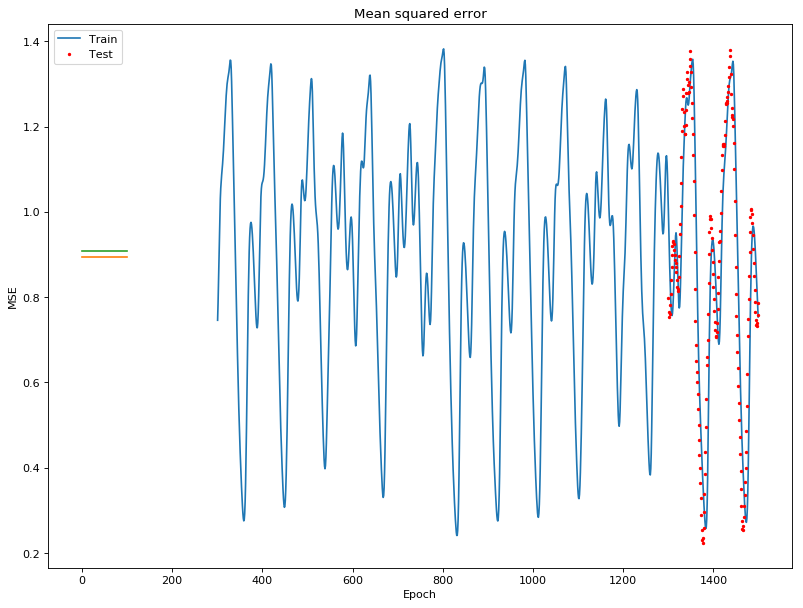

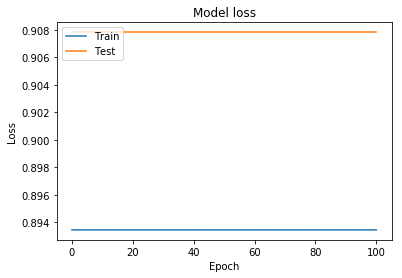

Nodes first layer:  100 , Nodes second layer 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________
Epoch 00336: early stopping
MSE training: 0.0007803586286172504
MSE val: 0.0008083021821221337


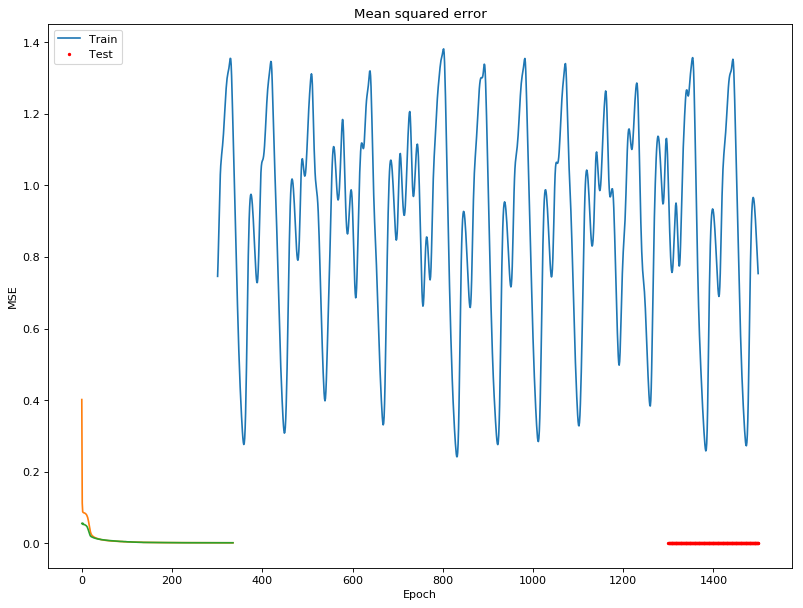

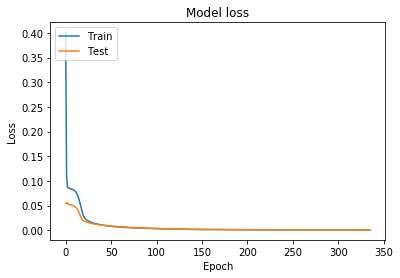

Nodes first layer:  1 , Nodes second layer 50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934374861419201
MSE val: 0.9078386873006821


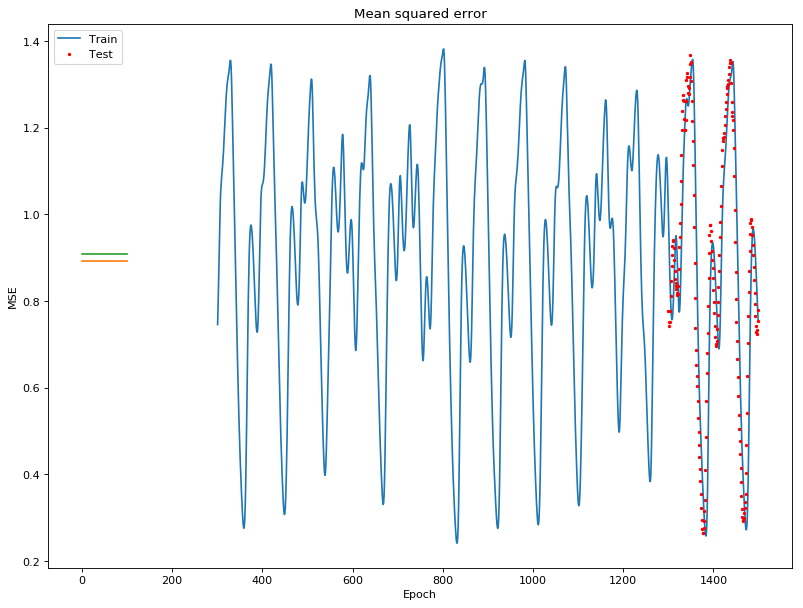

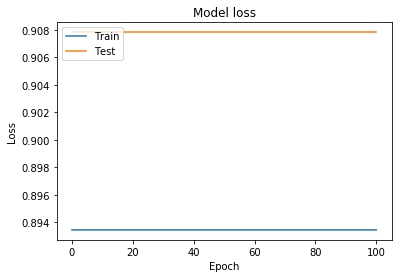

Nodes first layer:  10 , Nodes second layer 50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________
Epoch 00296: early stopping
MSE training: 0.0013034193034400232
MSE val: 0.001068313722498715


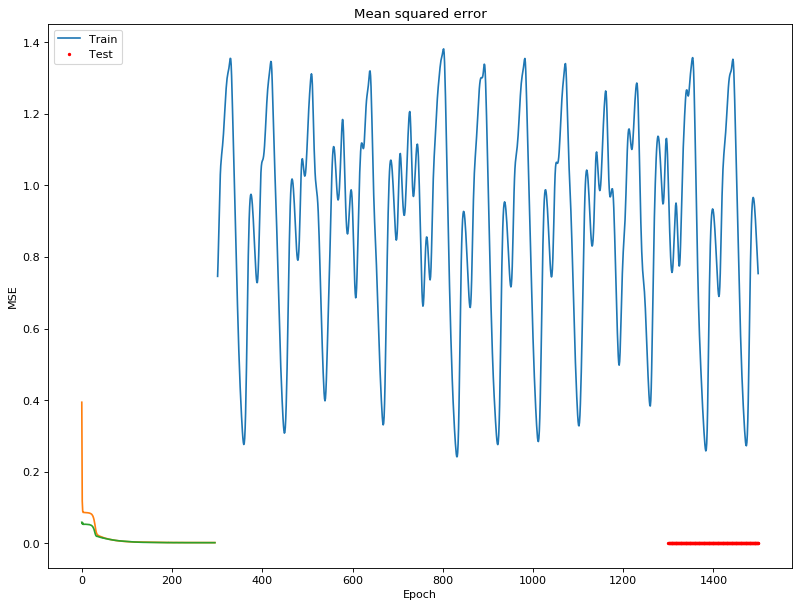

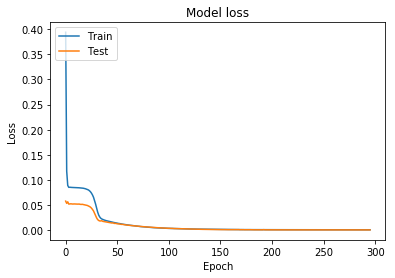

Nodes first layer:  50 , Nodes second layer 50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934374824166298
MSE val: 0.9078386873006821


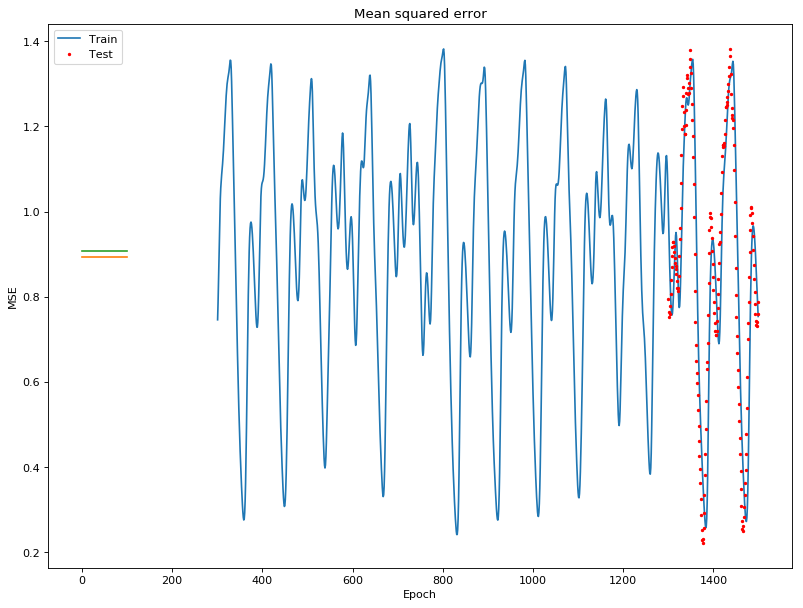

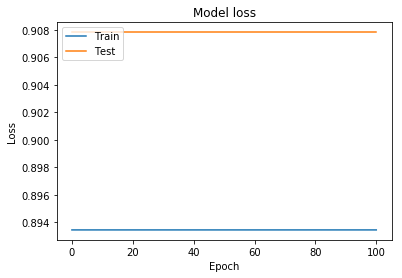

Nodes first layer:  100 , Nodes second layer 50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 5,701
Trainable params: 5,701
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934374898672104
MSE val: 0.9078386873006821


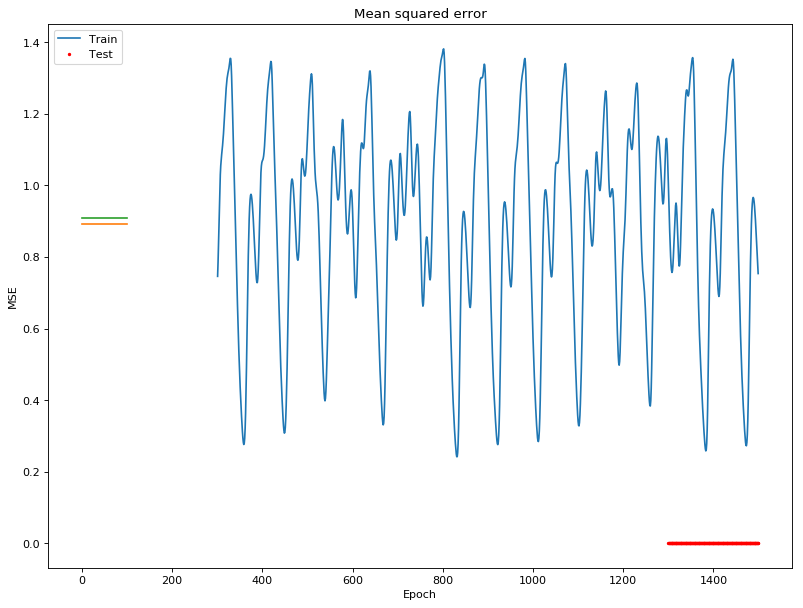

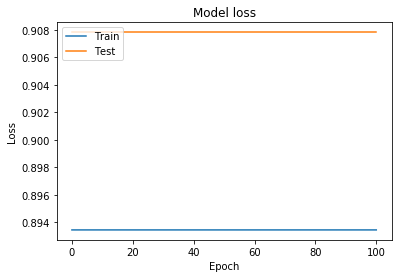

Nodes first layer:  1 , Nodes second layer 100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 00227: early stopping
MSE training: 0.00936895192717202
MSE val: 0.008821364375762641


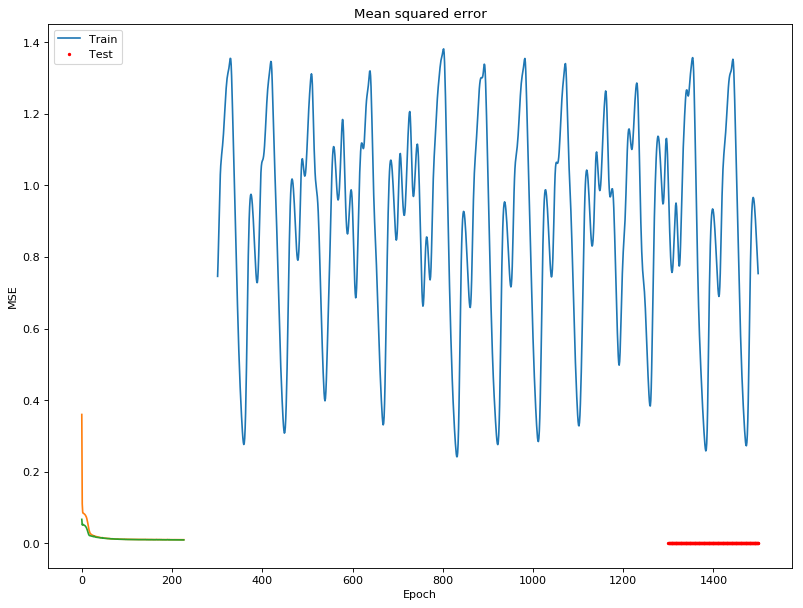

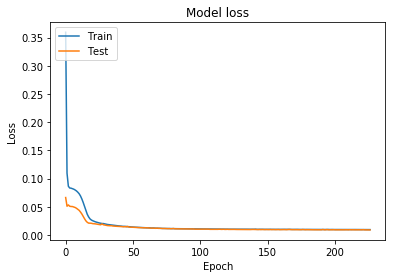

Nodes first layer:  10 , Nodes second layer 100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934374749660492
MSE val: 0.9078386873006821


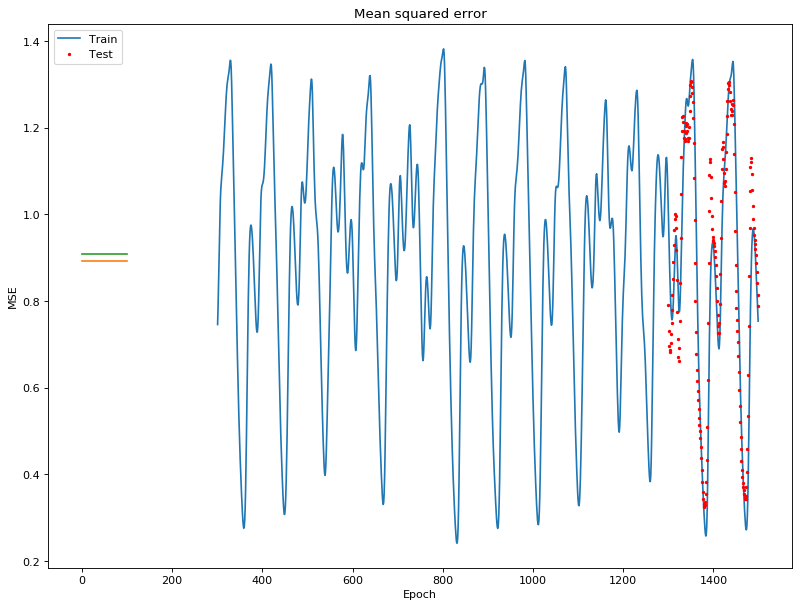

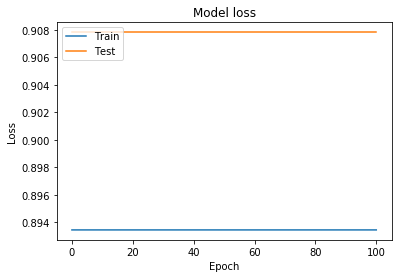

Nodes first layer:  50 , Nodes second layer 100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 5,501
Trainable params: 5,501
Non-trainable params: 0
_________________________________________________________________
Epoch 00319: early stopping
MSE training: 0.0008725113384571159
MSE val: 0.0008961368657764979


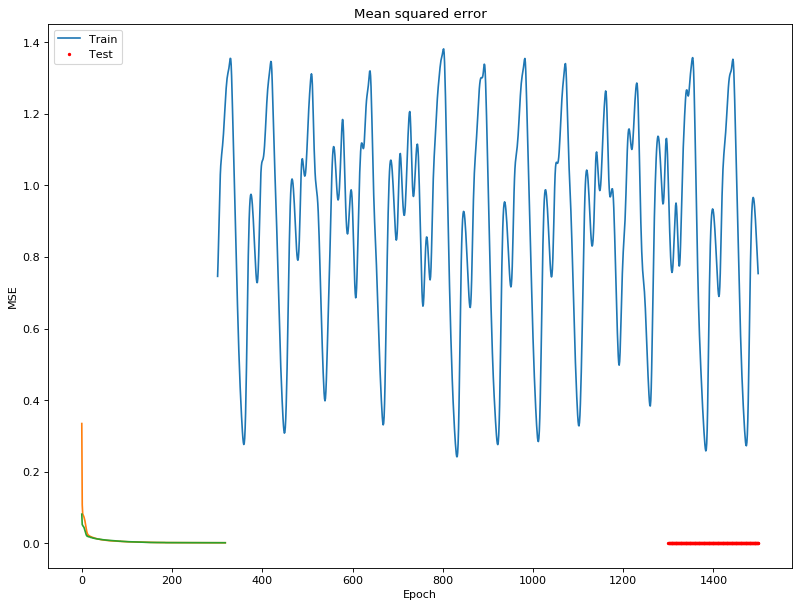

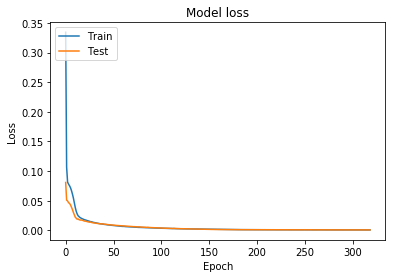

Nodes first layer:  100 , Nodes second layer 100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
MSE training: 0.8934374898672104
MSE val: 0.9078386873006821


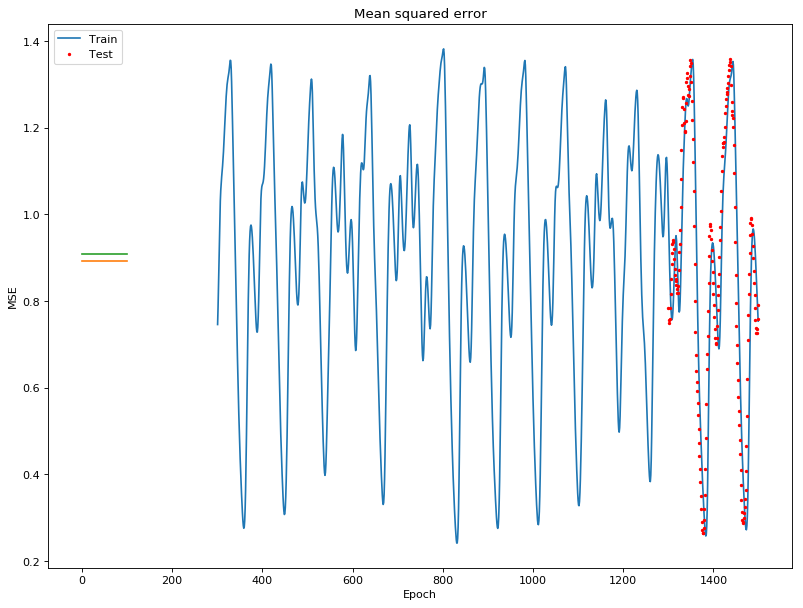

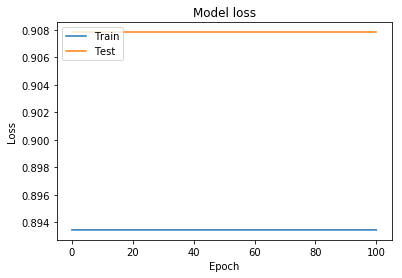

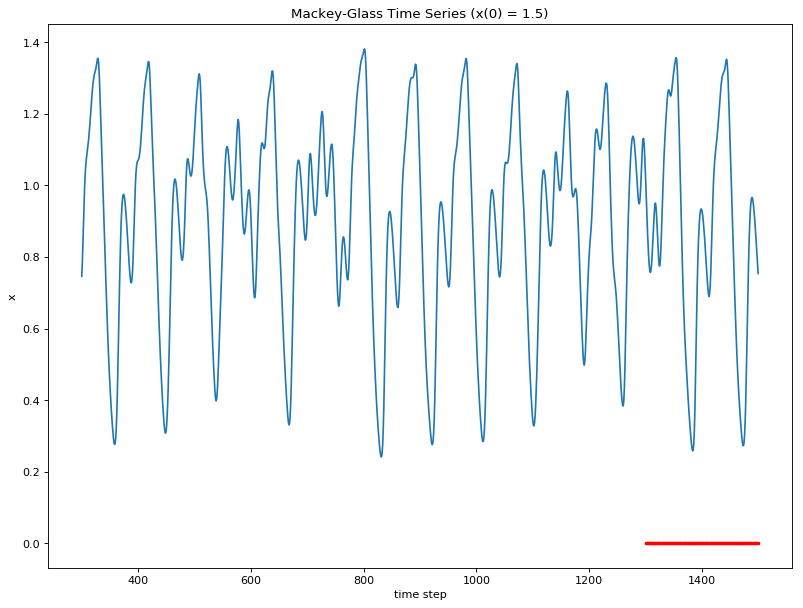

In [129]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))
#model, early_stopping = init_network([100, 1],0.0)

#history = model.fit(train_set, train_labels, epochs=10000, batch_size=50, validation_split=0.2,  callbacks=[early_stopping], verbose=1)


train_set, train_labels, test_set, test_labels = get_train_test_data(x)
nodes_first_layer = [1,10,50,100]
hidden_nodes_second_layer = [1,10,50,100]
hidden_nodes_third_layer = [1,10,50,100]



for j in range(len(hidden_nodes_second_layer)):
    for k in range(len(nodes_first_layer)):
        print("Nodes first layer: ", nodes_first_layer[k], ", Nodes second layer", hidden_nodes_second_layer[j])

    #if hidden_nodes_first_layer[j] > hidden_nodes_second_layer[i]:
        model, early_stopping = init_network([nodes_first_layer[k],hidden_nodes_second_layer[j]],0.0)

        history = model.fit(train_set, train_labels, epochs=10000, batch_size=50, validation_split=0.2,  callbacks=[early_stopping], verbose=0)

        predictions = model.predict(test_set, verbose=0)
        print("MSE training:",history.history['mean_squared_error'][-1])
        print("MSE val:",history.history['val_mean_squared_error'][-1])

        # Plot training & validation accuracy values
        plt.plot(history.history['mean_squared_error'])
        plt.plot(history.history['val_mean_squared_error'])
        plt.title('Mean squared error')
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()

        # Plot training & validation loss values
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()
        keras.backend.clear_session()
        
        figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
        t = np.arange(301,len(x)-500)
        plt.plot(t,x[301:len(x)-500])
        plt.plot(range(1300,1500),predictions,'ro',markersize=2)
        plt.xlabel("time step")
        plt.ylabel("x")
        plt.title("Mackey-Glass Time Series (x(0) = 1.5)")

Ju fler noder desto fler epoker innan early stop. MSE verkar inte bli mindre än med 10 noder i bägge lagren.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 100)               600       
_________________________________________________________________
dense_62 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 101       
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________
Epoch 00270: early stopping
MSE training: 0.001057249781297287
MSE val: 0.0010110848379554227


Text(0.5, 1.0, 'Mackey-Glass Time Series (x(0) = 1.5)')

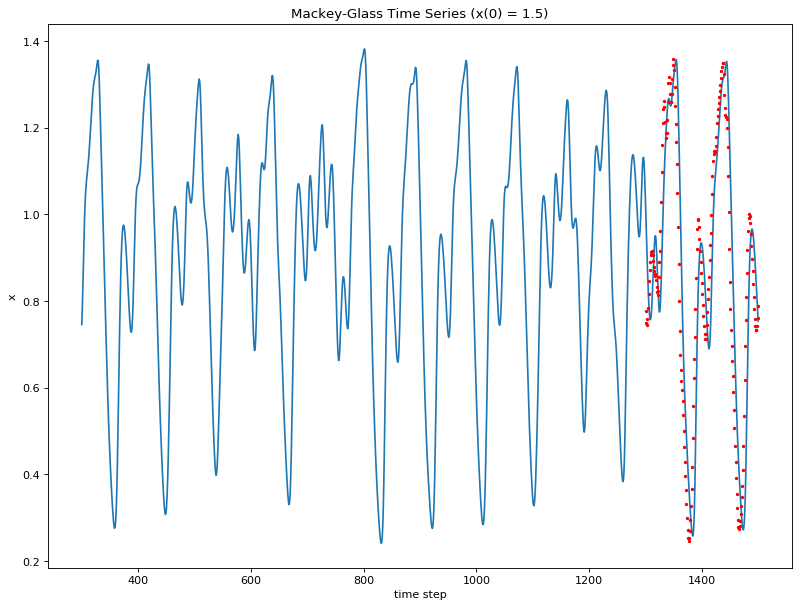

In [128]:
model, early_stopping = init_network([100, 100],0)

history = model.fit(train_set, train_labels, epochs=10000, batch_size=50, validation_split=0.2,  callbacks=[early_stopping], verbose=0)

predictions = model.predict(test_set, verbose=0)
print("MSE training:",history.history['mean_squared_error'][-1])
print("MSE val:",history.history['val_mean_squared_error'][-1])
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
t = np.arange(301,len(x)-500)
plt.plot(t,x[301:len(x)-500])
plt.plot(range(1300,1500),predictions,'ro',markersize=2)
plt.xlabel("time step")
plt.ylabel("x")
plt.title("Mackey-Glass Time Series (x(0) = 1.5)")

In [ ]:
#Testa olika

model, early_stopping = init_network([100, 100],0.000001)

history = model.fit(train_set, train_labels, epochs=10000, batch_size=50, validation_split=0.2,  callbacks=[early_stopping], verbose=0)
print("MSE training:",history.history['mean_squared_error'][-1])
print("MSE val:",history.history['val_mean_squared_error'][-1])
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
t = np.arange(301,len(x)-500)
plt.plot(t,x[301:len(x)-500])
plt.plot(range(1300,1500),predictions,'ro',markersize=2)
plt.xlabel("time step")
plt.ylabel("x")
plt.title("Mackey-Glass Time Series (x(0) = 1.5)")

In [ ]:
weights, biases = model.layers[0].get_weights()
plt.hist(weights)
plt.xlabel("weight value")
plt.ylabel("number of weights")
plt.title("Weight distribution for 100 nodes, lambda = 0")